In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
import nltk
import ssl
import re
import collections
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer


sw = stopwords.words('english')
style.use('ggplot')

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

    
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')


wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/maria/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/maria/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/maria/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [4]:
data = ''

with open('Harry1.txt', 'r') as f:
    data = f.read()

stopp = """"!\"/«#%$?,.'’:;(»)@&[{]}%*_<>+="""
data = data.lower()

raw = data.split('—')
raw = [w.strip('—') for w in raw]
data = ' '.join(raw)

raw = data.split()
raw = [word.strip(stopp) for word in raw]
ans = [wnl.lemmatize(word, pos='v') for word in raw]

with open('Harry1_lemm.txt', 'w') as f:
    f.write(' '.join(ans))

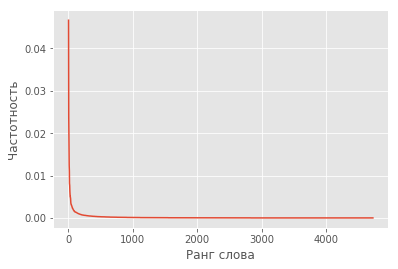

In [17]:
c = collections.Counter()
fig, ax = plt.subplots()

for word in ans:
    if word != '':
        c[word] += 1

X = [x for x in range(1, len(c)+1)]
Y = sorted([y/len(ans) for y in c.values()], reverse=True)

ax.set_xlabel('Ранг слова')
ax.set_ylabel('Частотность')

plt.plot(X, Y)

plt.show()

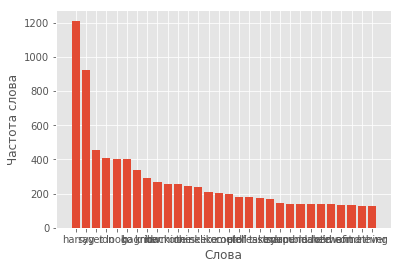

In [5]:
filtered_data = [w for w in ans if w not in sw]
fig, ax = plt.subplots()
c2 = collections.Counter()

for word in filtered_data:
    if word != '':
        c2[word] += 1

X = [x for x in range(30)]
mst_c = c2.most_common(30)

plt.bar(X, [x[1] for x in mst_c])

ax.set_xlabel('Слова')
ax.set_ylabel('Частота слова')
ax.set_xticks(np.arange(len(mst_c)))
ax.set_xticklabels([w[0] for w in mst_c])

plt.show()